UNDER CONSTRUCTION (and TRANSLATION.) Modified for BMED360 2020-03-23 (A.L) from Versjon 30.12.2019 by A. S. Lundervold  

# A next and more extensive example on Machine Learning

A version of this notebook (in Norwegian) can also be accessed form the ELMED219 course GitHub-repo: https://github.com/MMIV-ML/ELMED219-2020.

> Below, you will hit upon some cells marked as «Yor turn!». In these sections we encourage you to experiment with the code.

The aim is to gradually introduce basic ingredients and techniques in machine leaning. 

We first address a classical and much studied «benchmark» data set: the [Iris flower data set](https://archive.ics.uci.edu/ml/datasets/iris)

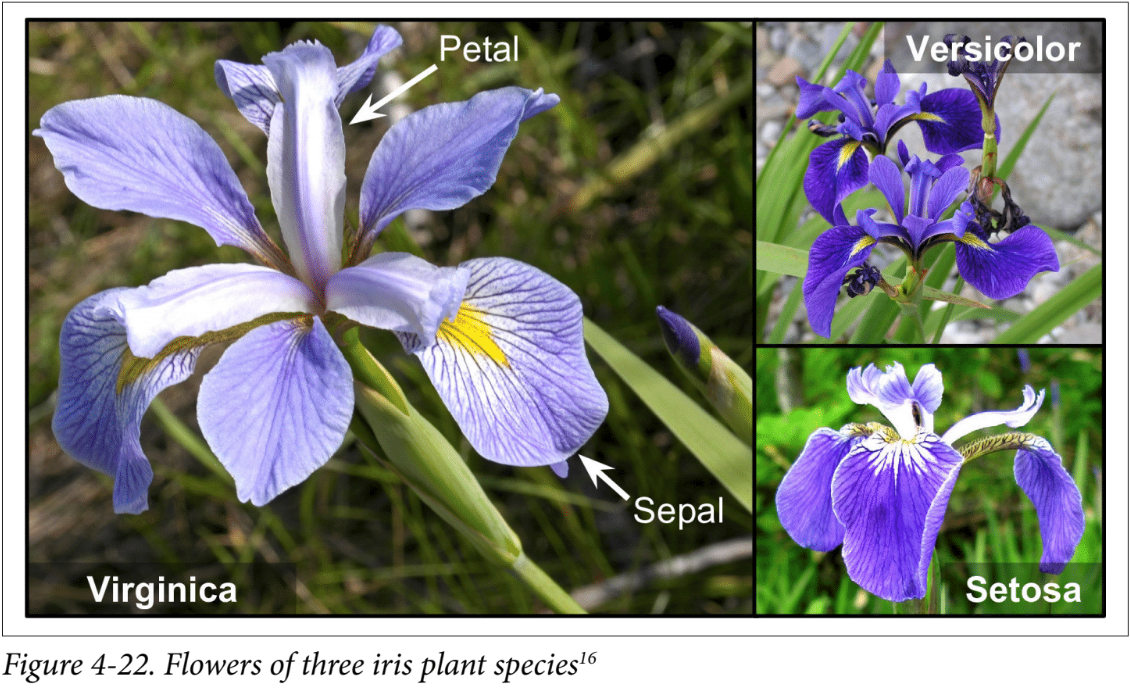

In [1]:
import IPython
IPython.display.Image("./assets/iris.png", width="60%")

Oppgaven er å predikere typen Iris-blomst, enten Iris-Setosa, Iris-Versicolor eller Iris-Virginica, fra dens sepal- og petal-lengder og -bredder (begerblad og kronblad).

> Merk: å tilordne en klasse til hvert datapunkt kalles **klassifikasjon**.

# Setup of our  Python environment

Gjennom hele kurset skal vi bruke [numpy](https://www.datacamp.com/community/tutorials/python-numpy-tutorial) til numeriske beregninger, [pandas](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python) for å arbeide med tabulære data, og [matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python) til å lage figurer. Du bør gjøre deg kjent med alle tre. Lenkene over er til korte tutorials. Du finner mer via Del 0 i kursets MittUiB-side.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Vi setter en random seed for å gjøre notebooken reproduserbar
np.random.seed(42)

In [4]:
# For å vise plots direkte i notebooken:
%matplotlib inline

For maskinlæringsdelen av ELMED219 skal vi stort sett bruke `scikit-learn`:

In [5]:
import sklearn

# Read and explore data (EDA)

Iris er et standard benchmark-datasett som følger med scikit-learn:

In [6]:
from sklearn.datasets import load_iris

> **Nyttig tips**: Ved å plassere spørsmålstegn foran et Python-objekt i Jupyter får du opp dokumentasjonen. (Du kan også trykke Shift+Tab inne i cellen. Med to spørsmålstegn får du kildekoden).

In [7]:
#?load_iris

In [8]:
#??load_iris

In [9]:
iris_dataset = load_iris()

Du finner en beskrivelse av Iris-datasettet under nøkkelen `DESCR`:

In [10]:
#iris_dataset

In [11]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Liste av tilgjengelige *features* i datasettet:

In [12]:
features = iris_dataset['feature_names']
print(f"Features: {features}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Liste av tilgjengelige *labels*:

In [13]:
print(f"Labels: {iris_dataset['target_names']}")

Labels: ['setosa' 'versicolor' 'virginica']


Hvor mye data har vi?

In [14]:
iris_dataset['data'].shape

(150, 4)

Vi har 150 rader og 4 søyler med data. Hver rad av data kalles et sample. Hver søyle en _feature_ eller en _egenskap_.

_Labels_ til data-instansene er lagret under nøkkelen `target`:

In [15]:
iris_dataset['target'].shape

(150,)

...kodet som 0, 1 eller 2, som svarer til de ulike plantene listet i `feature_names`:

In [16]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

0 er Iris-Setosa, 1 er Iris-Versicolor og 2 er Iris-Virginica.

Det er veldig ofte hensiktsmessig å bruke Pandas når en arbeider med tekst-baserte datasett. La oss samle treningsdata i en Pandas dataframe (et tabell-format):

In [18]:
iris_df = pd.DataFrame(iris_dataset['data'], columns=features)

Her er de første ti radene:

In [19]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Det er også praktisk å legge til labels i hver instans:

In [20]:
iris_df['label'] = iris_dataset['target']

In [21]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Visualize data

Det er interessant å undersøke _fordelingen_ til de ulike features. Vi kan bruke plotte-funksjonaliteten til Pandas til å lage **histogrammer**:

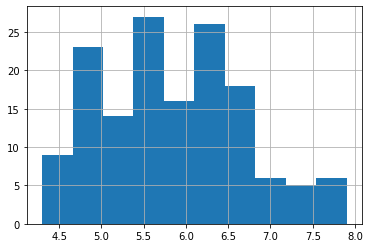

In [22]:
# Fordelingen til en spesifisert feature for alle plantene
feat = 'sepal length (cm)'
iris_df[feat].hist()
plt.show()

In [23]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

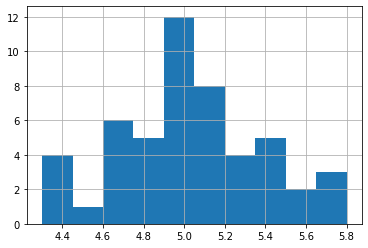

In [24]:
# Fordelingen av sepal-lengder for en spesifisert plante
plant = 0 # Iris-Setosa
iris_df[feat][iris_df['label'] == plant].hist()
plt.show()

**Scatter plots** kan fortelle oss hvordan de ulike features varierer blant plantene:

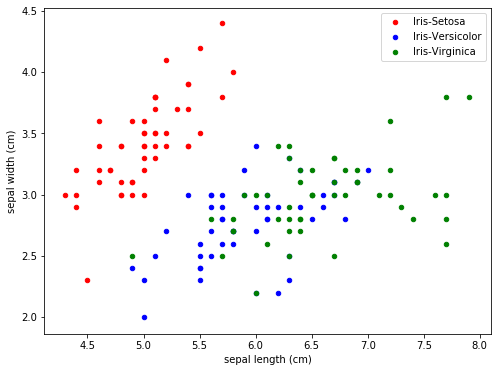

In [25]:
# Scatter plot av sepal length versus sepal width, farget med plante-klasse:

ax = iris_df[iris_df['label'] == 0].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='red', label='Iris-Setosa', figsize=(8,6))

iris_df[iris_df['label'] == 1].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='blue', label='Iris-Versicolor', ax=ax)

iris_df[iris_df['label'] == 2].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='green', label='Iris-Virginica', ax=ax)

plt.show()

Pandas kan faktisk lage disse plottene for oss for hvert par av features i data frame-en. Vi farger dottene med deres label ved å bruke `c = iris_df['label']`.

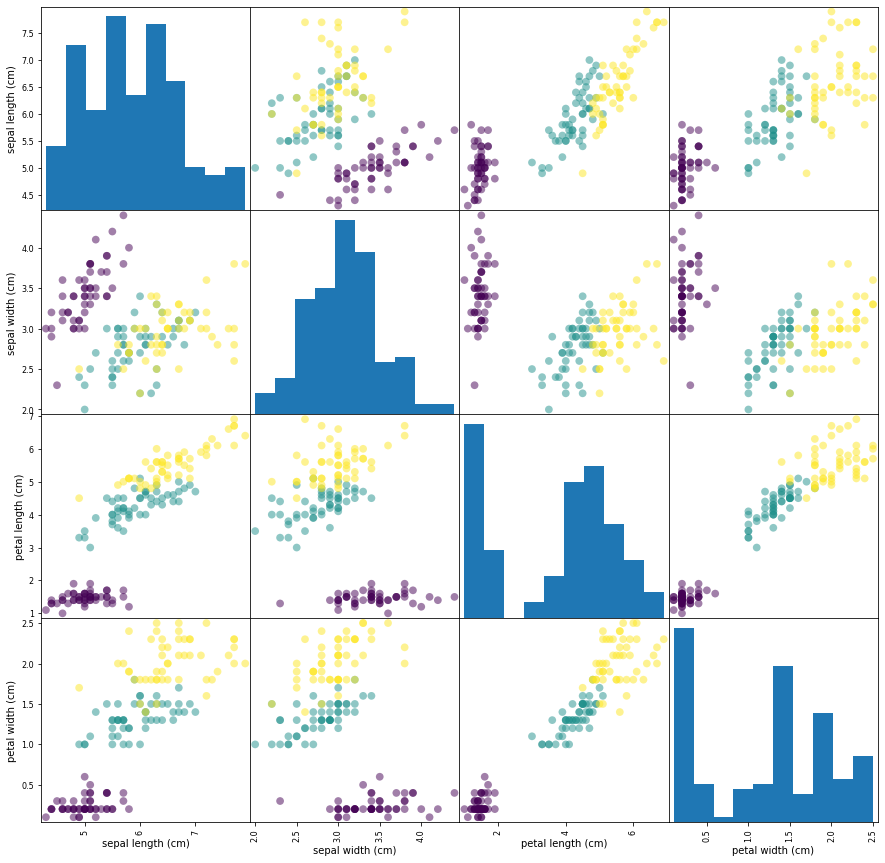

In [26]:
pd.plotting.scatter_matrix(iris_df[features], c=iris_df['label'], figsize=(15,15), marker='o', s=60)
plt.show()

Diagonalen viser histogram til hver feature.

Vi observerer at fargene er godt adskilt. **Å få en maskinlæringsmodell til å skille klassene fra hverandre virker derfor lovende!**

> Visualisering av data er en kritisk del av anvendt maskinlæring. Nøye konstruerte plots kan avdekke mønstre i data, mønstre vi kan utnytte når vi konstruerer prediktive maskinlæringsmodeller.

> **Din tur!** For å få en følelse av de mange teknikker som finnes for å visualisere data, ta en kjapp titt på eksempel-galleriet til Python-biblioteket `seaborn`: https://seaborn.pydata.org/examples/index.html. Det er fritt frem å leke med eksemplene. Her er en guide til plotte-funksjonaliteten i Pandas som også er verdt en titt: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html. 

Her er to eksempler på litt mer avanserte plots. Det er ikke nødvendig å bry seg om koden som genererer disse nå.

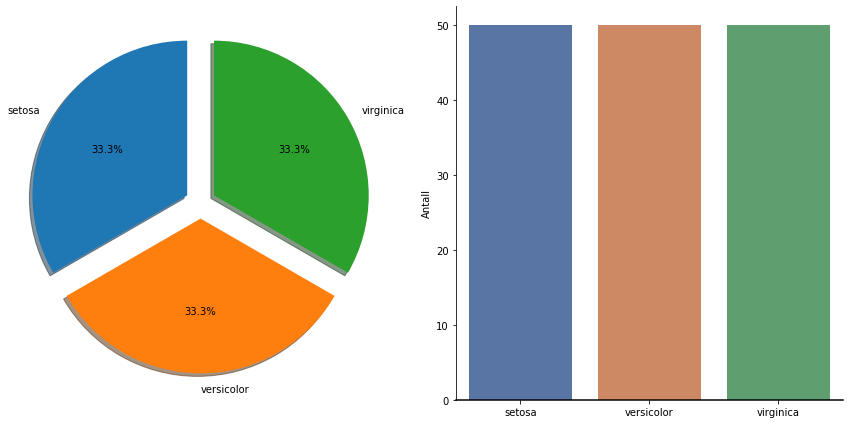

In [27]:
import seaborn as sns

_, counts = np.unique(iris_dataset['target'], return_counts=True) # Antall blomster av hver type
labels = iris_dataset['target_names'] # Navn på blomstene

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Pie chart:
ax1.pie(counts, explode=[0.1, 0.1, 0.1], labels=labels, startangle=90, autopct='%1.1f%%', shadow=True)

# Bar plot:
sns.barplot(x=labels, y=counts, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Antall")
sns.despine(bottom=True)

# Vis plots
plt.tight_layout(h_pad=2)

## Select features

Vi kan velge å trene modeller på én eller flere av de tilgjengelige features. La oss bruke `sepal length` og `sepal width`:

In [28]:
# Vi velger 0te og 1ste rad siden disse inneholder sepal length og width:
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

In [29]:
X.shape

(150, 2)

Vi har nå tilgang til to målinger (sepal-lengde og -bredde) for 150 blomster. Fra disse features, lagret i X, skal vår modell predikere korrekt label y.

Her er de første fem instansene med tilhørende label:

In [30]:
print(X[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [31]:
print(y[:5])

[0 0 0 0 0]


> Årsaken til at vi ikke bruker alle fire features i konstruksjonen av våre modeller nedenfor er at oppgaven ville blitt _for enkel_. Mer om det senere.

> Tilrettelegging og preprosessering av data, og det som kalles **feature engineering**, er noe av det viktigste, mest tidkrevende og vanskeligste i anvendt maskinlæring. Faktisk er typisk selve modelleringen en svært liten del av virkelige-verden-utvikling av maskinlæringssystemer. Mesteparten av tiden (og koden) brukes på andre ting, som å samle data, renske og tilrettelegge data, og å designe gode features. 

> Det er forøvrig også mange viktige utfordringer rundt det å _deploye_ og _monitorere_ modeller, men det skal vi snakke lite om i vårt kurs. 

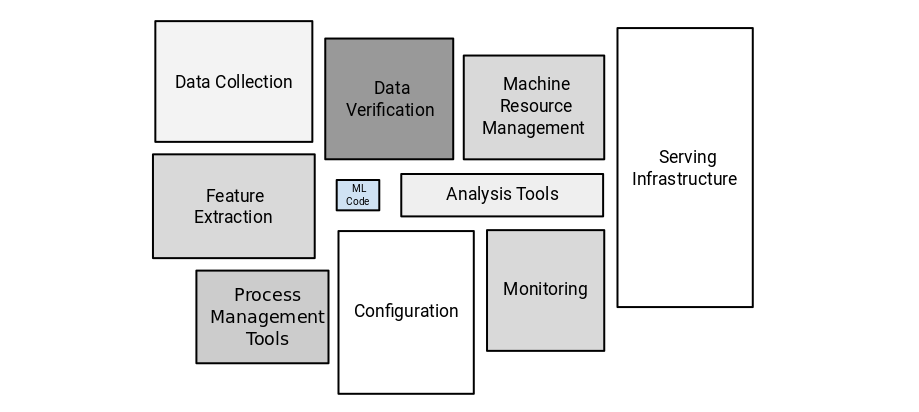

In [32]:
IPython.display.Image("assets/MLsystem.png", width="95%")

<center><small>Bilde fra <a href="https://developers.google.com/machine-learning/crash-course">Google ML crash course</a> </small></center>

# Training and test dataset


Vi skal bygge en maskinlæringsmodell som er i stand til å predikere Iris-art _for nye målinger som kommer inn_. For å _simulere_ slike målinger setter vi til side et **test-datasett**: en mengde data som ikke blir brukt til å bygge modellen. Hvis vi hadde trent modellen ved å bruke alle data vi har vil den (typisk) bare «huske utenat», og ikke være i stand til å predikere korrekt på nye data som kommer inn. Den vil **generalisere** dårlig.

Vi bruker **treningsdata til å konstruere modellen** og **testdata til å evaluere modellen**.

Med Scikit-learns sin `train_test_split`-funksjon kan vi sette til side 25% av data (med tilhørende labels) som testdata:

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
print(f'Training data: {X_train.shape}\nTest data: {X_test.shape}')

Training data: (112, 2)
Test data: (38, 2)


Vi samler treningsdata i en dataframe:

In [36]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'][0:2])

In [37]:
iris_df.head(10)

,sepal length (cm),sepal width (cm)
0,5.0,3.6
1,5.2,4.1
2,5.8,2.7
3,6.0,3.4
4,6.7,3.1
5,5.4,3.9
6,5.4,3.7
7,5.5,2.4
8,6.3,2.8
9,6.4,3.1


...samme med testdata

In [38]:
iris_df_test = pd.DataFrame(X_test, columns=iris_dataset['feature_names'][0:2])
iris_df_test.head(10)

,sepal length (cm),sepal width (cm)
0,6.1,2.8
1,5.7,3.8
2,7.7,2.6
3,6.0,2.9
4,6.8,2.8
5,5.4,3.4
6,5.6,2.9
7,6.9,3.1
8,6.2,2.2
9,5.8,2.7


# Prediction model

Det finnes en rekke ulike maskinlæringsmodeller som kan brukes til klassifikasjon. I løpet av kurset skal vi komme borti flere.

En av de beste og mest fleksible er de såkalte tre-baserte-modeller. For ekempel **random forests**, basert på **beslutningstrær** (**decision trees**). Vi skal lære mer om disse senere i kurset. Foreløpig bruker vi random forest som en «black box», uten nærmere forklaring.

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(random_state=42, n_estimators=100) # random_state for reproducibility

Klassifikasjonsmodellene i scikit-learn er Python klasser, og kommer alltid med `fit` og `predict`-metoder. Med `fit` tilpasses modellen data (i.e. modellen trenes på data), mens `predict` brukes til å teste modellen.

In [41]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Som du ser over er det en rekke parametre man kan velge i en `RandomForestClassifier` (vi bruker default-verdier).

# Evaluation of model prediction

In [42]:
y_pred = rf.predict(X_test)


Modellen har nå predikert labels på test-data, og vi kan sjekke hvor god prediksjonen ble. **Nøyaktigheten** (**accuracy**) til prediksjonen er et naturlige mål å bruke: altså antall korrekte prediksjoner delt på totalt antall prediksjoner.

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, y_pred)


0.7894736842105263

Det er viktig å se nærmere på hvilke typer feil modellen gjorde. **Forvirringsmatriser** (**confusion matrix**) er spesielt nyttig til dette:

En forvirringsmatrise er en tabell som lister resultatene fra klassifikasjonsmodellens prediksjoner. På hvilken måte er klassifikatoren «forvirret»? Hva slags typer feil gjør den?

Ideen er å telle opp antall ganger instanser fra en viss klasse blir klassifisert som de ulike klassene i problemet. 

In [45]:
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)

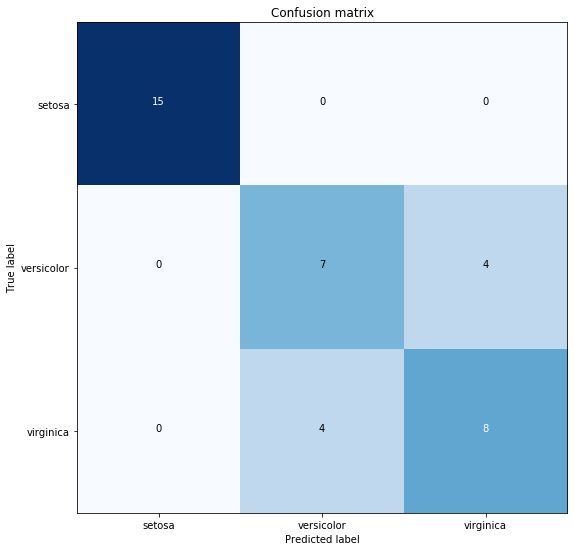

In [46]:
_ = plot_confusion_matrix(cm, classes=iris_dataset['target_names'])

Vi observerer at modellen enkelt kan skille setosa fra de andre, men er svært forvirret om forskjellen på versicolor og virginica.

Vi skal se flere måter å evaluere maskinlæringsmodeller i løpet av kurset.

> **Din tur!**
> - Forsøk å endre litt på default-parametre i `RandomForestClassifier`. Kan du oppnå bedre treffsikkerhet? Hint: forsøk å øke `n_estimators`. Vi skal lære mer om hva parametrene i random forests betyr senere.
> - Forsøk å bruke alle fire features i modellen (petal- og sepal-lengde og -bredde). Hva blir treffsikkerheten?
> - Bytt ut `RandomForestClassifier` med en annen klassifikator. For eksempel `SGDClassifier`. Hint: `from sklearn.linear_model import SGDClassifier`.

# The complete code

Her er koden vi behøvde for å laste inn data, velge features, splitte opp i trenings- og testdata, trene en modell og predikere. Åtte kodelinjer!

In [47]:
# Load the data and split into data and labels
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7894736842105263

# Another example

Vi repeterer prosedyren over på et annet velkjent benchmark-datasett: **Diabetes Data Set**.

Du finner en beskrivelse av datasettet her: https://www.kaggle.com/uciml/pima-indians-diabetes-database. Det er også tilgjengelig via https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv. 

I maskinlæring er en stor del av jobben å organisere data og lage gode features. Vi skal snakke mer om dette senere; foreløpig hopper vi over temaet og bruker et ferdig tilrettelagt (og derfor ikke særlig realistisk) datasett. 

## Read and explore the data

Vi kan laste inn data med `urllib`, og lagre filen i katalogen `./data`:

In [48]:
import urllib.request

url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'

# Lag katalog for å lagre data:
import os
if not os.path.exists('data'):
    os.makedirs('data')
    
# Last ned
urllib.request.urlretrieve(url, 'data/diabetes.csv')

('data/diabetes.csv', <http.client.HTTPMessage at 0x7fd50a123750>)

Vi bruker som vanlig Pandas til å laste inn data:

In [49]:
diabetes = pd.read_csv('data/diabetes.csv')

In [50]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Vi ser at det er åtte feature-søyler og én target (diabetes).

Vi kan få mer informasjon med `describe`-metoden:

In [52]:
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Vi ser at alle features er numeriske, og at det ikke er none manglende verdier (missing values). 

Her er en kort beskrivelse av hver feature, sakset fra Kaggle-lenken over:

- Pregnancies: number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic: Diastolic blood pressure (mm Hg)
- Triceps: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DPF: Diabetes pedigree function
- Age: Age (years)
- Diabetes: Class variable (0 or 1)

Som før kan vi visualisere sammenhenger mellom features i scatter plots og histogram. Vi farger hver sample ved å bruke hvorvidt det tilhører en diabetiker eller ikke:

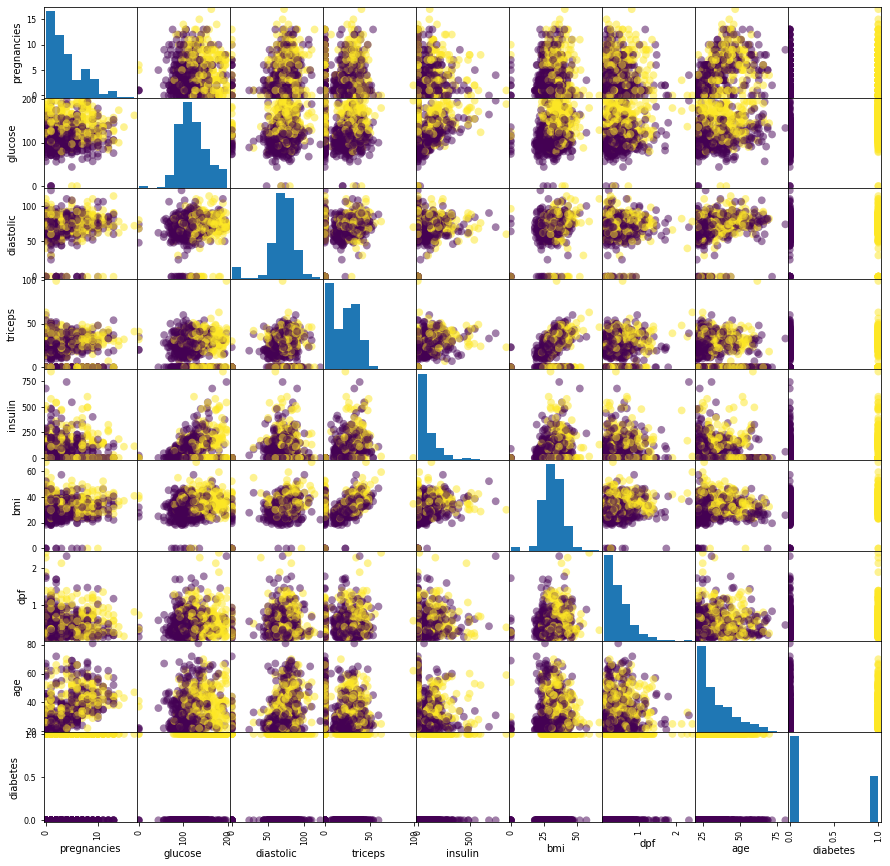

In [53]:
pd.plotting.scatter_matrix(diabetes, c=diabetes['diabetes'], figsize=(15,15), marker='o', s=60)
plt.show()

Å klassifisere basert på dette datasettet ser vesentlig vanskeligere ut enn for Iris. 

In [54]:
# Vi lar X bestå av alle søyler bortsett fra siste (i.e. alle features)
X = diabetes[diabetes.columns[0:-1]]
# ..og lar y være target
y = diabetes['diabetes']

In [55]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [56]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

## Training and test datasets

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Machine learning model

Vi bruker en random forest-klassifikator:

In [58]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Model (performance) evaluation

Vi produserer prediksjoner på testdata og beregner treffsikkerheten:

In [59]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.734375

Med denne modellen kan vi altså predikere diabetes fra de gitte features i det gitte datasettet med en treffiskkerhet på 73.4%.

<span style="font-size:200%; color:blue">Machine learning models are rather generic!</span>

> **Viktig!** Legg merke til at vi angrep diabetes-data på akkurat samme måte som Iris-data!

Dette var vår kode for Iris:

In [60]:
# Last inn data
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Splitt i trenings- og test-data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Importer og tren en maskinlæringsmodell
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Prediksjoner på testdata
y_pred = rf.predict(X_test)

# Evaluer modellen
accuracy_score(y_test, y_pred)

0.7894736842105263

Her var koden for diabetes:

In [61]:
# Last inn data
diabetes = pd.read_csv('data/diabetes.csv')
X = diabetes[diabetes.columns[0:-1]] 
y = diabetes['diabetes']

# Splitt i trenings- og test-data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Importer og tren en maskinlæringsmodell
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Prediksjoner på testdata
y_pred = rf.predict(X_test)

# Evaluer modellen
accuracy_score(y_test, y_pred)

0.734375

**Den eneste forskjellen var at vi endret på datasettet!**

> Maskinlæringsmodeller er generiske: samme modell kan brukes til ulike oppgaver!

# A further study - diabetes: understand model's prediction

En viktig del av å konstruere gode maskinlæringsmodeller er å inspisere hva modellene har lært. Hvordan modellen veier ulike features når den tar sine avgjørelser, hvordan den ville reagert om features var annerledes på et interessant vis, og så videre. Dette er nyttig både for å forbedre modellene og input-data, og, noen ganger, for å få en bedre forståelse av problemet modellen forsøker å løse (her er et interessant eksempel på dette [img1](assets/stanford_1.png), [img2](assets/stanford_2.png), et eksempel vi vil se nærmere på i Lab 1). 

## Feature importance

Med random forests kan en beregne hvor mye hver feature betydde for prediksjonene: såkalt **feature importance**. 

In [62]:
importances = rf.feature_importances_
importances

array([0.07449143, 0.27876091, 0.08888318, 0.07157507, 0.07091345,
       0.15805822, 0.11822478, 0.13909297])

In [63]:
# Finn indeks av features med høyest importance, sortert fra størst til minst:
indices = np.argsort(importances)[::-1]
# Print de ut
for f in range(X.shape[1]): 
    print(f'{X.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

glucose: 0.28
bmi: 0.16
age: 0.14
dpf: 0.12
diastolic: 0.09
pregnancies: 0.07
triceps: 0.07
insulin: 0.07


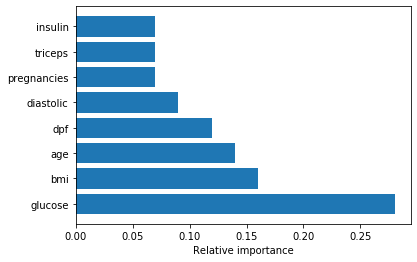

In [64]:
# Plot dette
plt.barh(X.columns[indices], np.round(importances[indices],2))
plt.xlabel("Relative importance")
plt.show()

Glukosenivået har størst forklaringsverdi, etterfulgt av BMI. Det er ikke vanskelig å forestille seg at slik info er nyttig i praksis! 

**MEN:** Feature importances kan fort overtolkes: feature importances fra én enkelt modell kan være svært misvisende. 

Feature importance i random forest-modeller i scikit-learn er basert på å måle hvor effektivt hver feature reduserer usikkerhet (såkalt *impurity* i random forests). Dette vil ofte resultere i et ukorrekt estimat av hvor viktig hver feature *faktisk* er. Se https://explained.ai/rf-importance/index.html for et dypdykk i dette. 

En mer robust teknikk er såkalt **permutation importance**

## Permutation importance

Ideen bak permutation importance er at om en feature er viktig for prediksjonen så bør tilfeldig omstokking av dataene i tilhørende søyle føre til en drastisk forverring av modellen. Dersom en feature derimot er uviktig vil en slik shuffling ikke bety så mye.

Biblioteket `eli5` inneholder en implementasjon av denne ideen, kompatibel med scikit-learn:

In [65]:
import eli5
from eli5.sklearn import PermutationImportance

/home/arvid/anaconda3/envs/bmed360v2020/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/arvid/anaconda3/envs/bmed360v2020/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [66]:
perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1031 ± 0.0576,glucose
0.0187 ± 0.0083,bmi
0.0104 ± 0.0114,insulin
0.0083 ± 0.0169,dpf
-0.0073 ± 0.0156,triceps
-0.0115 ± 0.0202,pregnancies
-0.0146 ± 0.0305,diastolic
-0.0188 ± 0.0214,age


Vi ser at `glucose` er aller viktigst. Om en shuffler `glucose` minker modellens accuracy med nesten 10 prosentpoeng. De fire featuresene som fikk negativ vekt er veldig uviktige for prediksjonene: om en shuffler disse tilfeldig kan en faktisk oppnå _bedre_ resultater!

## Partial dependence plots

PDP er en annen nyttig metode for å tolke prediksjoner fra maskinlæringsmodeller. Ideen er å plotte prediksjoner mens verdiene til en spesifisert feature økes. For eksempel, hva hender med predikert sannsynlighet for diabetes om glukose-nivået økes? Siden dette er en viktig feature forventer vi ganske store endringer (faktisk, siden det er diabetes vi studerer forventer vi at sannsynligheten øker). Og hva med uviktige features?

Vi kan bruke biblioteket `PDPbox`, som er kompatibelt med scikit-learn (se https://pdpbox.readthedocs.io/en/latest for detaljer):

In [67]:
from pdpbox import pdp

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


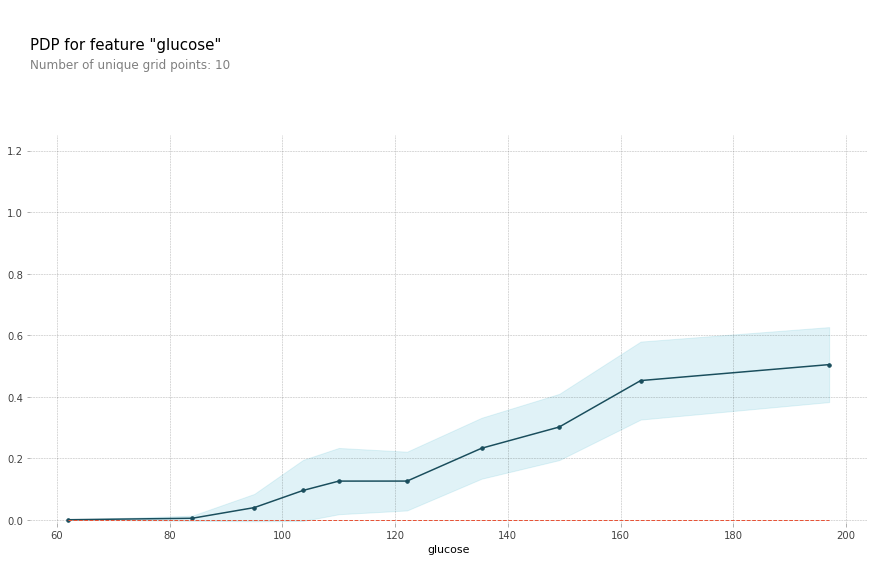

In [68]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='glucose')
pdp.pdp_plot(pdp_goals, 'glucose')
plt.show()

Som forventet: økt glukosenivå fører til økt predikert sannsynlighet for diabetes.

Det samme gjelder BMI:

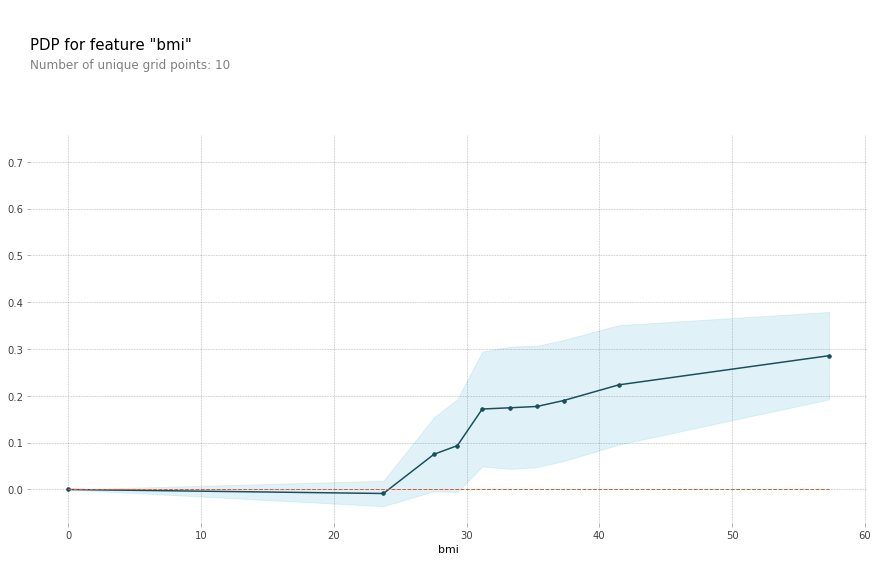

In [69]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='bmi')
pdp.pdp_plot(pdp_goals, 'bmi')
plt.show()

Plottet for alder viser hvorfor denne featuren var uviktig: predikert sannsynlighet øker litt i starten (lav alder), men så flater den ut:

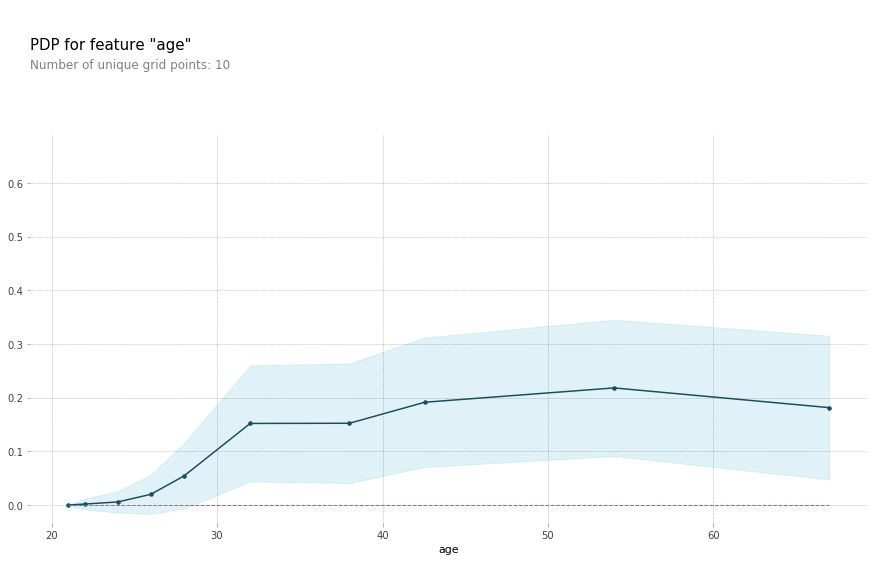

In [70]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='age')
pdp.pdp_plot(pdp_goals, 'age')
plt.show()

### Two-dimensional PDP: interaction between variables

Siden det typisk er kombinasjoner av variabler, ikke enkeltvariabler, som influerer prediksjoner kan det være nyttig å studere to-dimensjonale plots av interaksjonen mellom to variabler og resulterende predikert sannsynlighet:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


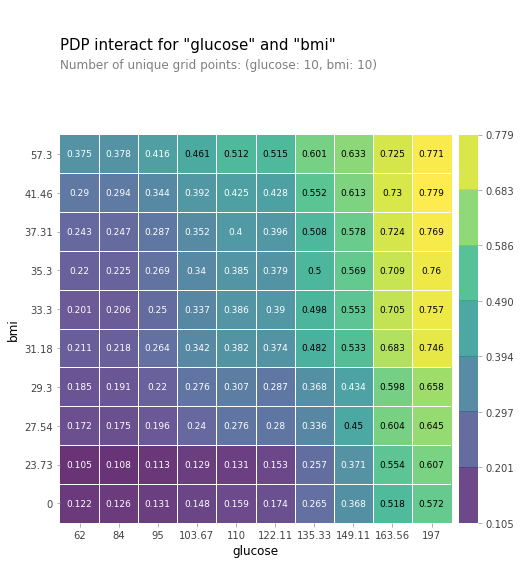

In [71]:
features = ['glucose', 'bmi']
interact  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), features=features)

pdp.pdp_interact_plot(pdp_interact_out=interact, feature_names=features, plot_type='grid')
plt.show()

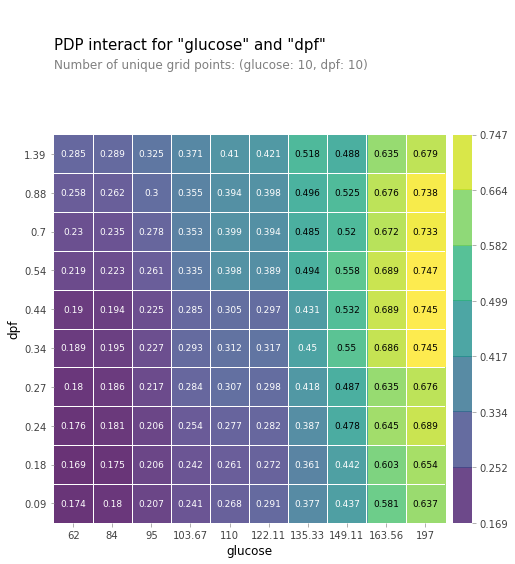

In [72]:
features = ['glucose', 'dpf']
interact  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), features=features)

pdp.pdp_interact_plot(pdp_interact_out=interact, feature_names=features, plot_type='grid')
plt.show()

> **MERK:** Disse konklusjone er selvfølgelig avhengig av datasettet vi studerer og modellen vi bruker. For å konkludere noe om diabetes og dets relasjon til glukosenivå, BMI, alder, osv, behøver man et nøye sammensatt (og stort) datamateriale.

> **Your turn!**
> - Hent ut feature importances for Iris-prediksjonene. Er det sepal-lengde eller -bredde som gir mest informasjon?
> - Konstruer en annen random forest ved å bytte ut random_state. Hva skjer med accuracy? Hva skjer med feature importances?
> - Forsøk å lage bedre random forest-modeller ved å endre på parametre. (Om du ønsker et dypdykk, bruk grid_search http://scikit-learn.org/stable/modules/grid_search.html til å finne gode parametre.)
> - Forsøk en annen klassifikasjonsmodell fra scikit-learn.
> - Bruk det du har lært hittil til å studere datasettet [Breast cancer wisconsin](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset):
> - **Ekstrautfordring**: Her er et annet godt tilrettelagt datasett: https://assets.datacamp.com/production/course_1939/datasets/auto.csv. Last det ned og repeter prosedyren over. Målet er å predikere bilers opprinnelsesland gitt diverse features.

In [73]:
# Hint til nest-siste oppgave over:
#from sklearn.datasets import load_breast_cancer
#breast = load_breast_cancer()
#X, y = breast['data'], breast['target']